In [32]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

#한글꺠짐 방지
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 어떤 데이터셋이 사라집니다 같은 문구 뺴고 오류만 출력시키는거 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_lfw_people

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold



from mpl_toolkits.mplot3d import Axes3D, axes3d

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

In [4]:
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test,y_test)))

테스트 세트 점수: 0.88


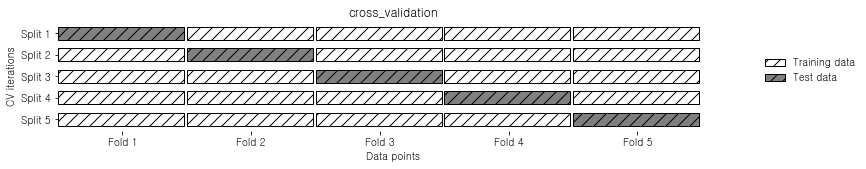

In [6]:
mglearn.plots.plot_cross_validation()

In [8]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [9]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("교차 검증 점수:", scores)

교차 검증 점수: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


In [10]:
print("교차 검증 평균 점쉬: {:.2f}".format(scores.mean()))


교차 검증 평균 점쉬: 0.97


In [12]:
res = cross_validate(logreg, iris.data, iris.target, return_train_score=True)
display(res)

{'fit_time': array([0.01660752, 0.01872945, 0.01368713, 0.01454115, 0.01324248]),
 'score_time': array([0.        , 0.        , 0.00099754, 0.        , 0.00099945]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [13]:
res_df = pd.DataFrame(res)
display(res_df)
print("평균 시간과 점수:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.016608,0.000000,0.966667,0.966667
1,0.018729,0.000000,1.000000,0.966667
2,0.013687,0.000998,0.933333,0.983333
3,0.014541,0.000000,0.966667,0.983333
4,0.013242,0.000999,1.000000,0.975000


평균 시간과 점수:
 fit_time       0.015362
score_time     0.000399
test_score     0.973333
train_score    0.975000
dtype: float64


In [14]:
iris = load_iris()
print("Iris 레이블:\n", iris.target)

Iris 레이블:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


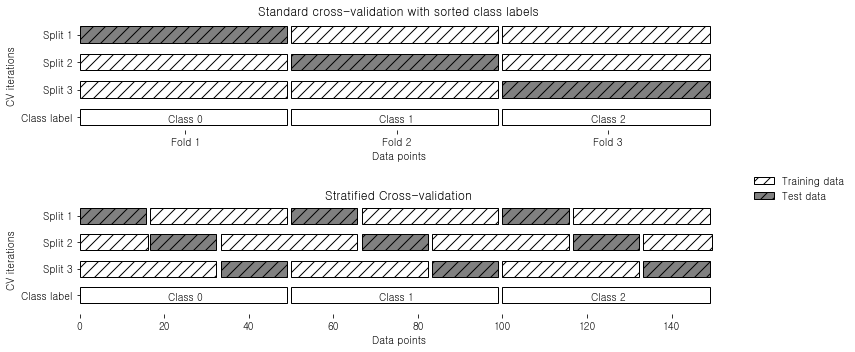

In [15]:
mglearn.plots.plot_stratified_cross_validation()

In [17]:
kfold = KFold(n_splits=5)

print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

교차 검증 점수:
 [1.         1.         0.86666667 0.93333333 0.83333333]


In [19]:
kfold = KFold(n_splits=3)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))


교차 검증 점수:
 [0. 0. 0.]


In [20]:
kfold = KFold(n_splits=3,shuffle=True, random_state=0)
print("교차 검증 점수:\n", cross_val_score(logreg, iris.data, iris.target, cv=kfold))


교차 검증 점수:
 [0.98 0.96 0.96]


In [22]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수: ", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수:  150
평균 정확도: 0.97


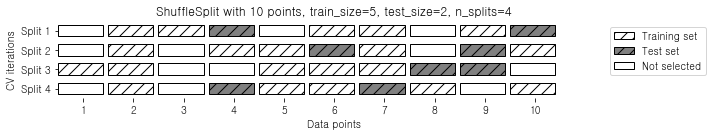

In [23]:
mglearn.plots.plot_shuffle_split()

In [25]:
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("교차 검증 점수:\n", scores)

교차 검증 점수:
 [0.94666667 0.98666667 0.92       0.98666667 0.97333333 0.94666667
 0.90666667 0.98666667 0.96       0.97333333]


In [27]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("교차 검증 점수:\n", scores)


교차 검증 점수:
 [0.75       0.6        0.66666667]


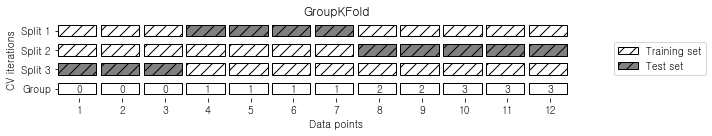

In [28]:
mglearn.plots.plot_group_kfold()

In [30]:
iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

In [33]:
rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print("교차 검증 점수:\n", scores)
print("교차 검증 평균 점수: {:.3f}".format(scores.mean()))

교차 검증 점수:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
교차 검증 평균 점수: 0.965
